# Match Kitti Sequence version 22-11

Reads a sequence of stereo images as Frame. The Frames are scanned to identify FramePoints that are pixels that are at the top or botrom of vertical lines in the image. A patch is taken around each of the FramePoints in the left hand image, to match these to a patch in the right hand image and estimate the disparity/distance of the framePoint.

A Sequence is created in which the first Frame is the KeyFrame. It's initial FramePoints are culled to keep only the points for which there is a confident estimate of its depth. The consecutive frames are used to track the KeyFrame's remaining FramePoints. Only a limited number of all framePoints will be found in the consecutive frames, mostly because nearby objects become larger quickly as we get closer. The matching FramePoints are given the same FramePointId as the corresponding point in the KeyFrame and its depth is estimated.

The results are dumped into a folder 'dump', containing files 0.txt, 1.txt, etc. 0.txt contains the FramePoints as observed from the first frame, 1.txt form the second frame, etc. In these files, each row contains a single FramePoint with the values FramePointID, X, Y, Depth.

In [1]:
# when you change a setting you have to restart the kernel (settings are only loaded once)
import os
os.environ['STEREO_CONFIDENCE'] = '1.6'
os.environ['SEQUENCE_CONFIDENCE'] = '1.6'
#os.environ['PATCH_SIZE'] = '17'
FRAMECOUNT = 1101

from urb_kitti import *
%matplotlib inline
import numpy as np

Read the first 10 frames from KITTI sequence 00.

In [2]:
%%time
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/01/image_2'
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/01/image_3'

frame = []
for frameid in range(FRAMECOUNT):
    filename = '%06d.png'%(frameid)
    left_frame = Frame(LEFTDIR + '/' + filename, RIGHTDIR)
    frame.append(left_frame)

CPU times: user 385 µs, sys: 916 µs, total: 1.3 ms
Wall time: 1.31 ms


In [3]:
%%bash
ls /data/urbinn/datasets/kitti/sequences/01/image_2 | wc -l


1101


Inspect the FramePoints for the first frame

We can also manually compute the Depth of the points and show these

Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept, and they are tracked in the other frames.

In [ ]:
seq = Sequence()
for f in ProgressBar()(frame):
    seq.add_frame(f)

  0% (5 of 1101) |                        | Elapsed Time: 0:00:07 ETA:  0:25:45

invalid speed 4.20373948795 -1.03510464781 
 [[ 0.97477079  0.0036529  -0.22317834  1.76321253]
 [-0.00251859  0.99998243  0.00536694 -0.1015843 ]
 [ 0.22319402 -0.00466944  0.97476286 -0.01759371]
 [ 0.          0.          0.          1.        ]]


  1% (16 of 1101) |                       | Elapsed Time: 0:00:19 ETA:  0:12:09

150 -1.00338851616 [[  9.98943459e-01   9.72309543e-05  -4.59560289e-02  -2.08941232e-02]
 [ -1.12544650e-05   9.99998249e-01   1.87109748e-03   7.17438652e-03]
 [  4.59561304e-02  -1.86860338e-03   9.98941711e-01  -1.00338852e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -2.08640786322 -1.09959396519 
 [[  9.95641204e-01   3.08054441e-03  -9.32153570e-02   6.39715736e-02]
 [ -2.89525640e-03   9.99993555e-01   2.12291185e-03   3.22341005e-02]
 [  9.32212960e-02  -1.84377615e-03   9.95643707e-01  -2.08640786e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (17 of 1101) |                       | Elapsed Time: 0:00:21 ETA:  0:15:16

146 -1.00517670237 [[  9.98912562e-01   3.57953037e-03  -4.64852676e-02  -1.64516709e-02]
 [ -3.59418415e-03   9.99993514e-01  -2.31654796e-04   3.21980523e-02]
 [  4.64841369e-02   3.98479497e-04   9.98918949e-01  -1.00517670e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -2.04236292523 -1.06812154425 
 [[  9.95616080e-01   3.06044939e-03  -9.34839845e-02   8.86356017e-02]
 [ -2.99482780e-03   9.99995161e-01   8.42239115e-04   3.24173737e-02]
 [  9.34861098e-02  -5.58578370e-04   9.95620427e-01  -2.04236293e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (29 of 1101) |                       | Elapsed Time: 0:00:32 ETA:  0:14:00

invalid speed 0.00978176847203 -0.836114527871 
 [[  9.94458456e-01  -1.91204635e-03  -1.05112909e-01   1.16544995e-01]
 [  1.18729390e-03   9.99975094e-01  -6.95713093e-03   2.61644327e-01]
 [  1.05123593e-01   6.79377777e-03   9.94435958e-01  -1.36437807e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (32 of 1101) |                       | Elapsed Time: 0:00:37 ETA:  0:21:20

invalid speed 1.6025639317 -1.05312674112 
 [[ 0.98815847 -0.01312812 -0.15287411  1.97624828]
 [ 0.01701677  0.99956336  0.02415632 -2.46549206]
 [ 0.15249023 -0.0264717   0.98795039 -1.74563854]
 [ 0.          0.          0.          1.        ]]


  3% (35 of 1101) |                       | Elapsed Time: 0:00:45 ETA:  0:30:47

invalid speed -2.60391667444 -1.08572143743 
 [[ 0.98866279  0.04793615 -0.14229549  2.92971594]
 [-0.04469653  0.99866537  0.02587838 -1.77550021]
 [ 0.14334609 -0.01922487  0.98948588 -5.90480226]
 [ 0.          0.          0.          1.        ]]


  3% (39 of 1101) |                       | Elapsed Time: 0:01:00 ETA:  0:49:45

invalid speed 1.04788572238 -1.14306766881 
 [[ 0.98621678 -0.0109049  -0.16509858  3.48114586]
 [ 0.01397536  0.99975011  0.01744753 -1.9040428 ]
 [ 0.16486706 -0.01951436  0.98612273 -3.57027774]
 [ 0.          0.          0.          1.        ]]


  4% (46 of 1101) |                       | Elapsed Time: 0:01:28 ETA:  1:00:13

invalid speed 49.6375225953 -1.05211915808 
 [[  9.77455870e-01   9.97685144e-03  -2.10903969e-01   1.99213376e+01]
 [ -9.87686215e-03   9.99950056e-01   1.52750217e-03  -5.52421497e+00]
 [  2.10908675e-01   5.90003469e-04   9.77505592e-01   4.17137463e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (49 of 1101) |#                      | Elapsed Time: 0:01:53 ETA:  1:32:19

invalid speed 4.40441479961 -1.23627740149 
 [[ 0.99888723  0.01217285 -0.04556454  2.50112023]
 [-0.01201411  0.99992077  0.00375614  0.13688259]
 [ 0.04560665 -0.00320454  0.99895434  0.55834975]
 [ 0.          0.          0.          1.        ]]


  4% (52 of 1101) |#                      | Elapsed Time: 0:02:22 ETA:  1:55:29

invalid speed 4.45539006632 -1.33682050348 
 [[  9.99100797e-01   1.46041332e-02  -3.98034864e-02   3.16815026e+00]
 [ -1.47382846e-02   9.99886645e-01  -3.07897970e-03   5.28286593e-01]
 [  3.97540086e-02   3.66284618e-03   9.99202783e-01   3.60216947e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (55 of 1101) |#                      | Elapsed Time: 0:02:54 ETA:  2:35:56

invalid speed 0.478050825004 -1.39480571998 
 [[  9.99851794e-01   4.76945610e-04  -1.72093556e-02   8.36729146e-01]
 [ -5.41967726e-04   9.99992732e-01  -3.77383448e-03  -7.76344504e-02]
 [  1.72074306e-02   3.78260209e-03   9.99844786e-01  -3.77852074e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (57 of 1101) |#                      | Elapsed Time: 0:03:20 ETA:  2:48:05

invalid speed -2.37117636669 -1.13749648632 
 [[  9.99984670e-01   2.21017224e-03  -5.07698858e-03  -1.43950854e-02]
 [ -2.21638286e-03   9.99996802e-01  -1.21798884e-03   4.40001494e-02]
 [  5.07428038e-03   1.22922272e-03   9.99986370e-01  -4.40907461e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (59 of 1101) |#                      | Elapsed Time: 0:03:44 ETA:  3:13:48

invalid speed 0.87942504761 -1.32365502873 
 [[  9.99955515e-01  -1.37953531e-04  -9.43128771e-03   1.05711580e+00]
 [  1.47466546e-04   9.99999481e-01   1.00797755e-03  -2.50675353e-01]
 [  9.43114377e-03  -1.00932351e-03   9.99955016e-01  -2.06290328e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (62 of 1101) |#                      | Elapsed Time: 0:04:10 ETA:  3:06:27

invalid speed -3.31129368999 -0.995690109639 
 [[  9.99997561e-01  -1.10310887e-03   1.91337610e-03   7.25080781e-02]
 [  1.10426913e-03   9.99999207e-01  -6.05444787e-04   1.12333900e-01]
 [ -1.91270671e-03   6.07556192e-04   9.99997986e-01  -6.43867452e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (65 of 1101) |#                      | Elapsed Time: 0:04:36 ETA:  2:55:05

invalid speed 1.91928953102 -1.00145842663 
 [[  9.99822125e-01  -9.59480200e-03  -1.62375559e-02   2.63826542e+00]
 [  9.60993891e-03   9.99953458e-01   8.54444770e-04  -5.13070123e-01]
 [  1.62286020e-02  -1.01033471e-03   9.99867797e-01  -1.61434353e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (67 of 1101) |#                      | Elapsed Time: 0:04:57 ETA:  2:46:48

invalid speed -2.45801638068 -0.978547943441 
 [[ 0.99977077  0.02089468  0.00467146  0.04622987]
 [-0.02085166  0.99974139 -0.00907546  0.71357378]
 [-0.00485988  0.00897597  0.99994791 -4.60125563]
 [ 0.          0.          0.          1.        ]]


  6% (71 of 1101) |#                      | Elapsed Time: 0:05:26 ETA:  2:16:28

invalid speed -2.05050430269 -1.60552457573 
 [[  9.99959313e-01   6.97060403e-03   5.72562064e-03  -2.60561144e-01]
 [ -6.94663804e-03   9.99967072e-01  -4.19502222e-03   2.99148675e-01]
 [ -5.75467395e-03   4.15507772e-03   9.99974809e-01  -9.02016583e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (83 of 1101) |#                      | Elapsed Time: 0:06:43 ETA:  1:33:50

invalid speed -3.83388962452 -1.5487133082 
 [[  9.99821160e-01  -1.27373271e-02  -1.39788670e-02   8.80124579e-01]
 [  1.25986449e-02   9.99870983e-01  -9.96447500e-03   1.47434538e+00]
 [  1.41039842e-02   9.78657817e-03   9.99852639e-01  -1.14737790e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (85 of 1101) |#                      | Elapsed Time: 0:07:01 ETA:  1:51:17

invalid speed 2.11978276046 -1.63558813354 
 [[ 0.9999346  -0.00195494 -0.01126835  0.15617986]
 [ 0.00192902  0.99999547 -0.00231044  0.00758575]
 [ 0.01127282  0.00228855  0.99993384 -1.36238102]
 [ 0.          0.          0.          1.        ]]


  7% (86 of 1101) |#                      | Elapsed Time: 0:07:18 ETA:  2:13:48

invalid speed -2.15681196107 -1.70815508085 
 [[  9.99956874e-01  -1.99063181e-03  -9.07120598e-03   5.19607986e-02]
 [  1.99085117e-03   9.99998018e-01   1.51515033e-05   2.04887425e-02]
 [  9.07115784e-03  -3.32102709e-05   9.99958856e-01  -4.01010094e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (90 of 1101) |#                      | Elapsed Time: 0:07:59 ETA:  2:21:41

160 -2.0115143097 [[  9.99990113e-01   2.97515265e-04  -4.43678222e-03  -1.41071964e-02]
 [ -2.89930990e-04   9.99998496e-01   1.70995401e-03   8.25099768e-03]
 [  4.43728428e-03  -1.70865075e-03   9.99988695e-01  -2.01151431e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.0685340101 -1.86803180306 
 [[  9.99960237e-01  -7.26474782e-04  -8.88805136e-03  -2.46532614e-02]
 [  7.55451516e-04   9.99994410e-01   3.25726690e-03   2.45507834e-02]
 [  8.88563535e-03  -3.26385187e-03   9.99955195e-01  -4.06853401e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (91 of 1101) |#                      | Elapsed Time: 0:08:13 ETA:  2:42:04

152 -2.02823761849 [[  9.99990109e-01  -4.64042535e-04  -4.42351350e-03  -1.00494449e-02]
 [  4.71201709e-04   9.99998581e-01   1.61753117e-03   2.04723614e-02]
 [  4.42275662e-03  -1.61959954e-03   9.99988908e-01  -2.02823762e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (92 of 1101) |#                      | Elapsed Time: 0:08:16 ETA:  2:41:52

invalid speed -4.21696621408 -1.87169173173 
 [[  9.99877438e-01  -6.10170824e-03  -1.44179603e-02   2.81667946e-02]
 [  6.13315961e-03   9.99978906e-01   2.13819287e-03   1.60581049e-02]
 [  1.44046096e-02  -2.22635846e-03   9.99893770e-01  -5.98917393e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (93 of 1101) |#                      | Elapsed Time: 0:08:29 ETA:  2:59:01

110 -2.05201274959 [[  9.99987969e-01  -1.36299312e-03  -4.71222071e-03  -1.18888374e-02]
 [  1.36464593e-03   9.99999008e-01   3.47552924e-04   6.15776248e-03]
 [  4.71174233e-03  -3.53979255e-04   9.99988837e-01  -2.05201275e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (94 of 1101) |#                      | Elapsed Time: 0:08:31 ETA:  2:38:15

invalid speed -4.48075883829 -1.8775433348 
 [[  9.99860262e-01  -7.25772780e-03  -1.50592491e-02  -3.18977274e-02]
 [  7.24098866e-03   9.99973104e-01  -1.16578007e-03   6.76705727e-02]
 [  1.50673049e-02   1.05657332e-03   9.99885923e-01  -6.24979137e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (96 of 1101) |##                     | Elapsed Time: 0:08:45 ETA:  2:25:28

invalid speed -2.78720351572 -1.53135431775 
 [[  9.99845734e-01   8.44659252e-04  -1.75441084e-02   3.39393052e-01]
 [ -8.33926378e-04   9.99999461e-01   6.19071982e-04   2.82295784e-02]
 [  1.75446218e-02  -6.04345985e-04   9.99845899e-01  -5.46468566e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (97 of 1101) |##                     | Elapsed Time: 0:08:56 ETA:  2:15:51

198 -2.00985772398 [[  9.99865069e-01   7.82078791e-04  -1.64083225e-02   5.41580420e-01]
 [ -7.82640522e-04   9.99999693e-01  -2.78132143e-05   7.49193569e-02]
 [  1.64082957e-02   4.06512795e-05   9.99865374e-01  -2.00985772e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.19920206226 -1.69085545316 
 [[  9.99918510e-01  -3.09756875e-04  -1.27623633e-02   8.74968715e-02]
 [  3.40719701e-04   9.99997004e-01   2.42400161e-03   3.09004168e-02]
 [  1.27615742e-02  -2.42815247e-03   9.99915620e-01  -4.19920206e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (98 of 1101) |##                     | Elapsed Time: 0:09:09 ETA:  2:29:58

173 -2.1392869871 [[  9.99969365e-01  -5.12817235e-04  -7.81069797e-03   8.68089219e-02]
 [  5.22282667e-04   9.99999132e-01   1.20986323e-03   1.35882582e-02]
 [  7.81007075e-03  -1.21390556e-03   9.99968764e-01  -2.13928699e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -3.52133929157 -1.84033263114 
 [[  9.99890483e-01  -1.73372760e-04  -1.47983456e-02   4.47224983e-01]
 [  1.86966498e-04   9.99999562e-01   9.17219939e-04   5.40365042e-04]
 [  1.47981801e-02  -9.19886283e-04   9.99890078e-01  -3.52133929e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (99 of 1101) |##                     | Elapsed Time: 0:09:19 ETA:  2:40:56

invalid speed -2.42913910461 -1.81396053549 
 [[  9.99887580e-01  -1.07469029e-05  -1.49942587e-02   1.91945391e-01]
 [  1.64084064e-05   9.99999929e-01   3.77455114e-04   3.37196584e-02]
 [  1.49942536e-02  -3.77658712e-04   9.99887509e-01  -4.19035545e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (100 of 1101) |#                     | Elapsed Time: 0:09:29 ETA:  2:31:31

205 -2.11154347647 [[  9.99982043e-01  -9.71855772e-04  -5.91354961e-03   2.46055643e-02]
 [  9.73647916e-04   9.99999481e-01   3.00186023e-04   1.11736517e-02]
 [  5.91325480e-03  -3.05938348e-04   9.99982470e-01  -2.11154348e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.196707748 -1.91315484915 
 [[  9.99941520e-01   9.83592865e-04  -1.07698378e-02   3.49283764e-02]
 [ -9.74143877e-04   9.99999136e-01   8.82567199e-04   7.69195730e-02]
 [  1.07706966e-02  -8.72024215e-04   9.99941614e-01  -4.19670775e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (101 of 1101) |##                    | Elapsed Time: 0:09:39 ETA:  2:22:28

122 -2.10103613314 [[  9.99981515e-01   1.12757979e-04  -6.07914844e-03   4.58832283e-02]
 [ -1.07935294e-04   9.99999679e-01   7.93638068e-04   3.41317997e-02]
 [  6.07923598e-03  -7.92967244e-04   9.99981207e-01  -2.10103613e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (102 of 1101) |##                    | Elapsed Time: 0:09:46 ETA:  2:29:04

96 -2.2339671983 [[  9.99956412e-01  -1.57050533e-03  -9.20371107e-03   1.35524776e-01]
 [  1.58131751e-03   9.99998068e-01   1.16760445e-03  -1.05903379e-02]
 [  9.20185956e-03  -1.18210755e-03   9.99956963e-01  -2.23396720e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (103 of 1101) |##                    | Elapsed Time: 0:09:51 ETA:  2:16:08

15 -3.79945169012 [[  9.99996433e-01   2.60269219e-03  -5.99932823e-04  -8.73104897e-01]
 [ -2.60373119e-03   9.99995101e-01  -1.73763398e-03   3.07546821e-01]
 [  5.95407358e-04   1.73918984e-03   9.99998310e-01  -3.79945169e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (104 of 1101) |##                    | Elapsed Time: 0:09:57 ETA:  2:21:45

10 -4.32995691984 [[ 0.99781584  0.01892143 -0.06328927  0.78155483]
 [-0.01986038  0.99970135 -0.0142397   0.6279439 ]
 [ 0.06300093  0.01546554  0.99789363 -4.32995692]
 [ 0.          0.          0.          1.        ]]


  9% (105 of 1101) |##                    | Elapsed Time: 0:10:03 ETA:  2:13:01

invalid speed -2.72875703387 -2.68050475497 
 [[  9.99974473e-01   3.40976107e-03  -6.27911054e-03   4.62258447e-02]
 [ -3.40317531e-03   9.99993648e-01   1.05922123e-03   4.29595136e-02]
 [  6.28268235e-03  -1.03782527e-03   9.99979725e-01  -4.36223821e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (106 of 1101) |##                    | Elapsed Time: 0:10:12 ETA:  2:24:30

33 -2.08953956625 [[  9.99870765e-01   1.58747796e-02  -2.53852048e-03   6.81413591e-02]
 [ -1.58782635e-02   9.99873010e-01  -1.35818143e-03   2.66592168e-01]
 [  2.51663728e-03   1.39831321e-03   9.99995856e-01  -2.08953957e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -6.57395402113 -2.48351635873 
 [[  9.99933518e-01  -7.98215162e-03  -8.32134960e-03   2.31371936e-01]
 [  7.96223957e-03   9.99965365e-01  -2.42327740e-03   7.09614485e-01]
 [  8.34040436e-03   2.35685972e-03   9.99962441e-01  -6.57395402e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (107 of 1101) |##                    | Elapsed Time: 0:10:21 ETA:  2:19:32

92 -2.19827966313 [[  9.99993217e-01  -9.28206998e-04  -3.56429811e-03   2.16130818e-02]
 [  9.27080684e-04   9.99999520e-01  -3.17637998e-04   2.49670994e-02]
 [  3.56459123e-03   3.14331452e-04   9.99993597e-01  -2.19827966e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.60093314263 -2.38843746019 
 [[  9.99956094e-01  -2.00839701e-03  -9.15297152e-03   1.89442118e-01]
 [  2.02392464e-03   9.99996528e-01   1.68751063e-03  -3.82565690e-02]
 [  9.14955055e-03  -1.70596147e-03   9.99956687e-01  -4.60093314e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (108 of 1101) |##                    | Elapsed Time: 0:10:30 ETA:  2:14:29

291 -2.1927554604 [[  9.99991198e-01  -1.13456102e-03  -4.03937140e-03   1.42444403e-02]
 [  1.13831482e-03   9.99998922e-01   9.27126522e-04   1.28471393e-02]
 [  4.03831516e-03  -9.31716438e-04   9.99991412e-01  -2.19275546e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (109 of 1101) |##                    | Elapsed Time: 0:10:41 ETA:  2:15:00

35 -2.17960812818 [[  9.99989499e-01  -1.18925258e-03  -4.42567293e-03   2.07173150e-02]
 [  1.19300606e-03   9.99998931e-01   8.45570758e-04   2.54187477e-03]
 [  4.42466261e-03  -8.50841733e-04   9.99989849e-01  -2.17960813e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (111 of 1101) |##                    | Elapsed Time: 0:11:01 ETA:  2:14:57

27 -2.18335607746 [[  9.99983560e-01   2.65700402e-04  -5.72790421e-03   4.01430071e-02]
 [ -2.73609482e-04   9.99999010e-01  -1.38005882e-03   1.32881833e-01]
 [  5.72753186e-03   1.38160334e-03   9.99982643e-01  -2.18335608e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (112 of 1101) |##                    | Elapsed Time: 0:11:11 ETA:  2:20:14

16 54.210141361 [[  3.70478982e-01  -9.05867028e-01   2.05305266e-01  -4.65385187e+01]
 [  9.28112468e-01   3.52280468e-01  -1.20439686e-01   1.29166394e+01]
 [  3.67773052e-02   2.35166749e-01   9.71258992e-01   5.42101414e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (113 of 1101) |##                    | Elapsed Time: 0:11:21 ETA:  2:27:27

9 2.23591497292e-06 [[  9.99996342e-01  -1.34165634e-04  -2.70149022e-03  -1.19594381e-05]
 [  1.37814403e-04   9.99999079e-01   1.35050986e-03   6.09225136e-06]
 [  2.70130654e-03  -1.35087722e-03   9.99995439e-01   2.23591497e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (114 of 1101) |##                    | Elapsed Time: 0:11:32 ETA:  2:35:56

148 -2.25151107107 [[  9.99989663e-01  -1.25235300e-04  -4.54518620e-03   3.98699982e-02]
 [  1.21131791e-04   9.99999585e-01  -9.03089313e-04   2.65989038e-02]
 [  4.54529742e-03   9.02529411e-04   9.99989263e-01  -2.25151107e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -2.97546619283 6.63514400431 
 [[  9.99860051e-01  -9.75599823e-04  -1.67010773e-02   1.33669018e+00]
 [  1.02846985e-03   9.99994487e-01   3.15736978e-03  -7.76866121e-01]
 [  1.66979049e-02  -3.17410446e-03   9.99855542e-01  -2.97546619e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (115 of 1101) |##                    | Elapsed Time: 0:11:42 ETA:  2:42:31

156 -2.30500333572 [[  9.99987848e-01   4.56871574e-04  -4.90858271e-03   4.52671999e-02]
 [ -4.60114511e-04   9.99999677e-01  -6.59557839e-04   5.00113622e-02]
 [  4.90827979e-03   6.61808334e-04   9.99987735e-01  -2.30500334e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.46208035754 3.65509489097 
 [[  9.99944579e-01   4.10740896e-03  -9.69376074e-03   1.25528373e-01]
 [ -4.09596416e-03   9.99990891e-01   1.20019366e-03  -1.53422059e-01]
 [  9.69860212e-03  -1.16042185e-03   9.99952294e-01  -4.46208036e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (116 of 1101) |##                    | Elapsed Time: 0:11:52 ETA:  2:44:54

318 -2.31759655658 [[  9.99989709e-01   1.01387081e-03  -4.42194782e-03   3.14505938e-02]
 [ -1.01335729e-03   9.99999480e-01   1.18369184e-04   3.51012082e-02]
 [  4.42206553e-03  -1.13886953e-04   9.99990216e-01  -2.31759656e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -3.25513347371 1.66419774178 
 [[ 0.99978519 -0.01063294 -0.01779069  1.23532994]
 [ 0.01075817  0.99991792  0.00695833 -0.75259043]
 [ 0.01771524 -0.00714823  0.99981752 -3.25513347]
 [ 0.          0.          0.          1.        ]]


 10% (117 of 1101) |##                    | Elapsed Time: 0:12:04 ETA:  2:50:09

326 -2.32780922731 [[  9.99992376e-01   1.84617226e-04  -3.90045783e-03   2.17797070e-02]
 [ -1.80446797e-04   9.99999412e-01   1.06954016e-03   1.77352600e-02]
 [  3.90065299e-03  -1.06882818e-03   9.99991821e-01  -2.32780923e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.61479654215 0.333528752086 
 [[  9.99975710e-01  -3.42976925e-04  -6.96147193e-03   1.05217210e-02]
 [  3.59894058e-04   9.99996985e-01   2.42900145e-03   3.62954197e-02]
 [  6.96061785e-03  -2.43144784e-03   9.99972819e-01  -4.61479654e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (118 of 1101) |##                    | Elapsed Time: 0:12:16 ETA:  2:53:41

297 -2.32792425009 [[  9.99991957e-01   1.43807489e-04  -4.00807125e-03   3.08473403e-02]
 [ -1.36577660e-04   9.99998363e-01   1.80403269e-03   1.64381143e-02]
 [  4.00832413e-03  -1.80347077e-03   9.99990340e-01  -2.32792425e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.27524502036 -0.553622248639 
 [[  9.99967719e-01   2.30379694e-04  -8.03166850e-03  -5.91669126e-02]
 [ -2.15767221e-04   9.99998320e-01   1.82017606e-03   7.44334985e-02]
 [  8.03207434e-03  -1.81838433e-03   9.99966089e-01  -4.27524502e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (119 of 1101) |##                    | Elapsed Time: 0:12:28 ETA:  2:55:08

85 -2.32678526262 [[  9.99995547e-01   1.05274271e-03  -2.79259081e-03  -1.12592131e-02]
 [ -1.04920864e-03   9.99998647e-01   1.26667772e-03   3.91781525e-03]
 [  2.79392052e-03  -1.26374207e-03   9.99995298e-01  -2.32678526e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.68549423217 -1.14467658663 
 [[  9.99974665e-01  -3.02405616e-04  -7.11177986e-03   2.79025147e-02]
 [  3.17483193e-04   9.99997704e-01   2.11905147e-03  -2.17690682e-03]
 [  7.11112272e-03  -2.12125566e-03   9.99972466e-01  -4.68549423e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (120 of 1101) |##                    | Elapsed Time: 0:12:41 ETA:  2:59:31

90 -2.35538907955 [[  9.99993778e-01   4.47967973e-05  -3.52735106e-03   1.44045634e-03]
 [ -4.22332766e-05   9.99999735e-01   7.26826335e-04   3.22697516e-02]
 [  3.52738269e-03  -7.26672841e-04   9.99993515e-01  -2.35538908e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -3.44826096163 -1.5482474176 
 [[ 0.99985738 -0.01036523 -0.0133333   0.9325015 ]
 [ 0.01041984  0.99993758  0.0040328  -0.49613721]
 [ 0.01329066 -0.00417115  0.99990298 -3.44826096]
 [ 0.          0.          0.          1.        ]]


 10% (121 of 1101) |##                    | Elapsed Time: 0:12:55 ETA:  3:05:59

403 -2.33955685676 [[  9.99990687e-01   5.66654092e-04  -4.27836954e-03   5.17663872e-02]
 [ -5.66210655e-04   9.99999834e-01   1.04856828e-04   1.29246052e-02]
 [  4.27842825e-03  -1.02433393e-04   9.99990842e-01  -2.33955686e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.66242370768 -1.81201723066 
 [[  9.99960606e-01  -5.05352380e-04  -8.86172828e-03   1.10331995e-01]
 [  5.05358220e-04   9.99999872e-01  -1.58019251e-06   1.82437924e-02]
 [  8.86172794e-03  -2.89821697e-06   9.99960734e-01  -4.66242371e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (122 of 1101) |##                    | Elapsed Time: 0:13:09 ETA:  3:13:13

434 -2.37503717377 [[  9.99986425e-01  -2.56357969e-05  -5.21046237e-03   7.55169564e-02]
 [  2.51939975e-05   9.99999996e-01  -8.48564367e-05   3.63269165e-02]
 [  5.21046452e-03   8.47240124e-05   9.99986422e-01  -2.37503717e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.75804904327 -1.99969054503 
 [[  9.99952241e-01   3.03607139e-03  -9.28963549e-03   1.09932530e-01]
 [ -3.03983383e-03   9.99995303e-01  -3.90921341e-04   9.59886314e-02]
 [  9.28840500e-03   4.19141619e-04   9.99956774e-01  -4.75804904e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (123 of 1101) |##                    | Elapsed Time: 0:13:23 ETA:  3:20:00

462 -2.35725952314 [[  9.99987080e-01   3.17121589e-03  -3.97274457e-03   3.77537443e-03]
 [ -3.17076412e-03   9.99994966e-01   1.20010183e-04   3.81658053e-02]
 [  3.97310515e-03  -1.07411997e-04   9.99992101e-01  -2.35725952e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.7077255424 -2.1188802044 
 [[  9.99964172e-01   4.36193967e-03  -7.25447369e-03   2.22508175e-03]
 [ -4.36709864e-03   9.99990222e-01  -6.95454345e-04   7.92386084e-02]
 [  7.25136923e-03   7.27110431e-04   9.99973444e-01  -4.70772554e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (124 of 1101) |##                    | Elapsed Time: 0:13:37 ETA:  3:25:00

415 -2.38130288517 [[  9.99986699e-01   2.20026026e-03  -4.66479190e-03   7.83481546e-02]
 [ -2.20349377e-03   9.99997336e-01  -6.88146539e-04   3.08701691e-02]
 [  4.66326537e-03   6.98416226e-04   9.99988883e-01  -2.38130289e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.81060924217 -2.20635443132 
 [[  9.99962128e-01   3.86173216e-03  -7.79936783e-03   8.60579209e-02]
 [ -3.87524659e-03   9.99991015e-01  -1.71839101e-03   8.91811453e-02]
 [  7.79266179e-03   1.74855040e-03   9.99968108e-01  -4.81060924e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (125 of 1101) |##                    | Elapsed Time: 0:13:52 ETA:  3:31:11

417 -2.37589526085 [[  9.99994532e-01   1.38732517e-03  -3.00200970e-03   1.58194456e-02]
 [ -1.39069190e-03   9.99998406e-01  -1.11969443e-03   5.39417059e-02]
 [  3.00045153e-03   1.12386318e-03   9.99994867e-01  -2.37589526e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.676523394 -2.26286804116 
 [[  9.99979909e-01   1.54085363e-03  -6.14878086e-03   6.68025813e-02]
 [ -1.55091177e-03   9.99997467e-01  -1.63136068e-03   1.05611192e-01]
 [  6.14625160e-03   1.64086412e-03   9.99979765e-01  -4.67652339e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (126 of 1101) |##                    | Elapsed Time: 0:14:06 ETA:  3:38:04

380 -2.42690082475 [[  9.99992401e-01  -1.38205218e-04  -3.89604448e-03   7.09801762e-02]
 [  1.34456877e-04   9.99999528e-01  -9.62334372e-04   4.65668328e-02]
 [  3.89617564e-03   9.61803209e-04   9.99991947e-01  -2.42690082e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.84401976122 -2.31754563569 
 [[  9.99980272e-01  -1.26863555e-03  -6.15196313e-03   7.92418652e-02]
 [  1.26275711e-03   9.99998743e-01  -9.59329342e-04   1.27783920e-01]
 [  6.15317243e-03   9.51541981e-04   9.99980616e-01  -4.84401976e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (127 of 1101) |##                    | Elapsed Time: 0:14:21 ETA:  3:42:05

211 -2.35680782239 [[  9.99993721e-01  -5.71583332e-04  -3.49743932e-03   6.87803416e-02]
 [  5.73746482e-04   9.99999645e-01   6.17523092e-04   2.98962987e-02]
 [  3.49708512e-03  -6.19525857e-04   9.99993693e-01  -2.35680782e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.79051543634 -2.33063303126 
 [[  9.99979296e-01  -8.68750447e-04  -6.37592441e-03   4.36892390e-02]
 [  8.82507625e-04   9.99997288e-01   2.15517967e-03   5.75096545e-02]
 [  6.37403480e-03  -2.16076185e-03   9.99977351e-01  -4.79051544e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (128 of 1101) |##                    | Elapsed Time: 0:14:37 ETA:  3:47:38

274 -2.46322440395 [[  9.99991619e-01  -7.75713777e-04  -4.01989309e-03   5.48637734e-02]
 [  7.83428008e-04   9.99997854e-01   1.91779498e-03   2.97351169e-02]
 [  4.01839681e-03  -1.92092820e-03   9.99990081e-01  -2.46322440e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -3.77710413648 -2.37483015549 
 [[  9.99972996e-01  -6.53582916e-03  -3.36015166e-03  -6.33330687e-01]
 [  6.54338174e-03   9.99976079e-01   2.24163113e-03   2.23572430e-01]
 [  3.34542037e-03  -2.26355735e-03   9.99991842e-01  -3.77710414e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (129 of 1101) |##                    | Elapsed Time: 0:14:52 ETA:  3:54:02

387 -2.43152309826 [[  9.99993545e-01  -9.99346168e-04  -3.45113261e-03   1.82540378e-02]
 [  1.00718031e-03   9.99996919e-01   2.26902823e-03   1.71651698e-03]
 [  3.44885443e-03  -2.27248950e-03   9.99991471e-01  -2.43152310e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.94713223224 -2.39372780308 
 [[  9.99980130e-01  -1.15062421e-03  -6.19804133e-03  -2.68022115e-02]
 [  1.17151743e-03   9.99993641e-01   3.36836355e-03   5.20092217e-02]
 [  6.19412619e-03  -3.37555773e-03   9.99975119e-01  -4.94713223e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (130 of 1101) |##                    | Elapsed Time: 0:15:08 ETA:  3:58:09

315 -2.48945704495 [[  9.99992750e-01  -1.11191387e-03  -3.64192448e-03   1.58587676e-02]
 [  1.11740533e-03   9.99998241e-01   1.50615848e-03   7.75598469e-03]
 [  3.64024336e-03  -1.51021707e-03   9.99992234e-01  -2.48945704e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (132 of 1101) |##                    | Elapsed Time: 0:15:25 ETA:  3:38:41

128 -2.50124196677 [[ 0.99998105  0.00561052 -0.00253278 -0.08262839]
 [-0.00561869  0.99997899 -0.0032327   0.28108656]
 [ 0.00251459  0.00324687  0.99999157 -2.50124197]
 [ 0.          0.          0.          1.        ]]


 12% (134 of 1101) |##                    | Elapsed Time: 0:15:38 ETA:  3:13:36

124 -2.45998178998 [[  9.99992776e-01  -6.05896632e-05  -3.80061476e-03   1.58090712e-02]
 [  5.76768603e-05   9.99999705e-01  -7.66508023e-04   2.95147829e-02]
 [  3.80066008e-03   7.66283278e-04   9.99992484e-01  -2.45998179e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.7466168264 -2.12181633343 
 [[  9.99965414e-01  -3.59643203e-03  -7.49915378e-03  -8.04962456e-02]
 [  3.55613763e-03   9.99979207e-01  -5.37962080e-03   4.91747321e-01]
 [  7.51834528e-03   5.35276671e-03   9.99957410e-01  -4.74661683e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (135 of 1101) |##                    | Elapsed Time: 0:15:48 ETA:  3:07:31

257 -2.49689584064 [[  9.99988731e-01  -2.54578201e-05  -4.74734418e-03   3.31239836e-02]
 [  2.16009420e-05   9.99999670e-01  -8.12478097e-04   4.48196880e-02]
 [  4.74736329e-03   8.12366395e-04   9.99988401e-01  -2.49689584e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.12357293781 -2.24684283583 
 [[  9.99828477e-01   4.85525742e-04  -1.85143654e-02   1.64156586e+00]
 [ -3.44792602e-04   9.99971032e-01   7.60372894e-03  -1.13015185e+00]
 [  1.85175209e-02  -7.59604110e-03   9.99799681e-01  -5.12357294e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (136 of 1101) |##                    | Elapsed Time: 0:15:58 ETA:  3:00:08

274 -2.49752959604 [[  9.99991864e-01  -8.44245324e-04  -3.94440421e-03   1.97805678e-02]
 [  8.45030281e-04   9.99999623e-01   1.97342955e-04   4.16109400e-02]
 [  3.94423612e-03  -2.00674491e-04   9.99992201e-01  -2.49752960e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.11264591036 -2.33040508923 
 [[  9.99979246e-01  -4.30012388e-03  -4.79763540e-03  -3.79629937e-01]
 [  4.28843312e-03   9.99987817e-01  -2.44440778e-03   4.73534564e-01]
 [  4.80808821e-03   2.42378271e-03   9.99985504e-01  -5.11264591e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (137 of 1101) |##                    | Elapsed Time: 0:16:09 ETA:  2:52:22

240 -2.51415470151 [[  9.99991378e-01  -4.53205866e-04  -4.12768311e-03   3.01888758e-02]
 [  4.56019101e-04   9.99999664e-01   6.80637537e-04   2.97837829e-02]
 [  4.12737326e-03  -6.82513972e-04   9.99991249e-01  -2.51415470e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.0976152929 -2.39165495999 
 [[  9.99970584e-01  -8.65754795e-04  -7.62111081e-03   6.24092217e-02]
 [  8.74881721e-04   9.99998904e-01   1.19433227e-03   6.98429186e-02]
 [  7.62006846e-03  -1.20096471e-03   9.99970246e-01  -5.09761529e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (138 of 1101) |##                    | Elapsed Time: 0:16:19 ETA:  2:43:48

288 -2.52934049185 [[  9.99994542e-01   4.49020893e-04  -3.27314483e-03   2.17310831e-03]
 [ -4.47860774e-04   9.99999837e-01   3.55159913e-04   4.68068896e-02]
 [  3.27330377e-03  -3.53692062e-04   9.99994580e-01  -2.52934049e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.96511368832 -2.43755013728 
 [[  9.99981396e-01   1.51217748e-04  -6.09790670e-03   2.18186234e-02]
 [ -1.47744981e-04   9.99999827e-01   5.69947909e-04   7.03439044e-02]
 [  6.09799183e-03  -5.69036370e-04   9.99981245e-01  -4.96511369e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (139 of 1101) |##                    | Elapsed Time: 0:16:29 ETA:  2:34:42

352 -2.47062591084 [[  9.99995165e-01   8.52722625e-04  -2.99032848e-03   1.31760916e-02]
 [ -8.51878665e-04   9.99999597e-01   2.83492492e-04   2.60181384e-02]
 [  2.99056902e-03  -2.80943725e-04   9.99995489e-01  -2.47062591e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.54387801254 -2.44857539513 
 [[  9.99999304e-01   5.68645012e-04   1.03360941e-03  -7.93872032e-01]
 [ -5.65029951e-04   9.99993735e-01  -3.49444560e-03   3.97220340e-01]
 [ -1.03559004e-03   3.49385914e-03   9.99993360e-01  -4.54387801e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (140 of 1101) |##                    | Elapsed Time: 0:16:40 ETA:  2:27:21

376 -2.48939021723 [[  9.99996379e-01   1.07397193e-03  -2.46748176e-03  -1.38046183e-03]
 [ -1.07558258e-03   9.99999209e-01  -6.51517490e-04   2.08787251e-02]
 [  2.46678010e-03   6.54169111e-04   9.99996744e-01  -2.48939022e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.77794857547 -2.46218033583 
 [[  9.99998934e-01   5.69809827e-04   1.34464851e-03  -8.34563723e-01]
 [ -5.62810004e-04   9.99986320e-01  -5.20033894e-03   4.31074647e-01]
 [ -1.34759332e-03   5.19957661e-03   9.99985574e-01  -4.77794858e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (141 of 1101) |##                    | Elapsed Time: 0:16:50 ETA:  2:37:16

341 -2.47215734653 [[  9.99995407e-01   1.33955450e-03  -2.71877011e-03   8.81403280e-03]
 [ -1.34265384e-03   9.99998451e-01  -1.13847364e-03   3.21552350e-02]
 [  2.71724085e-03   1.14211878e-03   9.99995656e-01  -2.47215735e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.31108601104 -2.46550600607 
 [[  9.99851492e-01   3.55898615e-03  -1.68619930e-02   1.51774572e+00]
 [ -3.41048374e-03   9.99955221e-01   8.82751613e-03  -1.13281164e+00]
 [  1.68926549e-02  -8.76869762e-03   9.99818858e-01  -5.31108601e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (142 of 1101) |##                    | Elapsed Time: 0:17:00 ETA:  2:31:49

307 -2.94487758854 [[  9.99985003e-01   4.79902424e-03   2.63895814e-03  -5.18763066e-01]
 [ -4.79367954e-03   9.99986454e-01  -2.02791271e-03   2.71839180e-01]
 [ -2.64865440e-03   2.01523197e-03   9.99994462e-01  -2.94487759e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.20006989038 -2.62529653356 
 [[  9.99979692e-01   1.53171536e-03  -6.18628371e-03   1.31912476e-01]
 [ -1.52610480e-03   9.99998420e-01   9.11555109e-04   7.68174863e-02]
 [  6.18767018e-03  -9.02095679e-04   9.99980449e-01  -5.20006989e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (143 of 1101) |##                    | Elapsed Time: 0:17:08 ETA:  2:41:27

331 -2.50928456436 [[  9.99997611e-01  -4.07800126e-04  -2.14756392e-03  -2.33230390e-02]
 [  4.09525078e-04   9.99999594e-01   8.02834633e-04   2.24611650e-02]
 [  2.14723565e-03  -8.03712196e-04   9.99997372e-01  -2.50928456e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.10546116803 -2.58662587716 
 [[  9.99990378e-01  -8.20210012e-04  -4.30946639e-03  -1.07765615e-01]
 [  8.21768495e-04   9.99999598e-01   3.59883495e-04   1.16915042e-01]
 [  4.30916948e-03  -3.63421416e-04   9.99990649e-01  -5.10546117e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (144 of 1101) |##                    | Elapsed Time: 0:17:17 ETA:  2:38:57

306 -2.44208490263 [[  9.99995134e-01  -8.51112875e-04  -3.00114501e-03   1.80139857e-02]
 [  8.51909397e-04   9.99999602e-01   2.64137569e-04   2.70447492e-02]
 [  3.00091900e-03  -2.66692987e-04   9.99995462e-01  -2.44208490e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.84478974725 -2.53844555232 
 [[  9.99861485e-01   1.12614098e-04  -1.66432402e-02   1.32117586e+00]
 [ -1.64916561e-04   9.99995053e-01  -3.14122583e-03   5.89347855e-01]
 [  1.66428041e-02   3.14353547e-03   9.99856557e-01  -4.84478975e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (145 of 1101) |##                    | Elapsed Time: 0:17:25 ETA:  2:35:03

311 -2.51139014099 [[  9.99999130e-01   2.77729027e-04  -1.28937779e-03  -5.98711905e-02]
 [ -2.76572580e-04   9.99999559e-01   8.96994483e-04   5.61618901e-02]
 [  1.28962634e-03  -8.96637096e-04   9.99998766e-01  -2.51139014e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.35289933904 -2.52942708187 
 [[  9.99828851e-01   4.54435239e-04  -1.84949018e-02   1.51699243e+00]
 [ -5.08870685e-04   9.99995553e-01  -2.93866793e-03   6.52407867e-01]
 [  1.84934841e-02   2.94757649e-03   9.99824636e-01  -5.35289934e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (146 of 1101) |##                    | Elapsed Time: 0:17:33 ETA:  2:30:19

290 -2.54460685761 [[  9.99997823e-01  -2.14317016e-04  -2.07546952e-03  -4.99917286e-02]
 [  2.16652282e-04   9.99999344e-01   1.12501527e-03   2.82220557e-02]
 [  2.07522705e-03  -1.12546247e-03   9.99997213e-01  -2.54460686e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.42744562396 -2.53448700712 
 [[  9.99974510e-01  -2.44293426e-03  -6.70910174e-03   1.88260497e-01]
 [  2.46346670e-03   9.99992303e-01   3.05382889e-03  -3.26100802e-02]
 [  6.70158980e-03  -3.07027869e-03   9.99972831e-01  -5.42744562e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (147 of 1101) |##                    | Elapsed Time: 0:17:40 ETA:  2:24:46

319 -2.52345909457 [[  9.99994458e-01  -2.41836612e-03  -2.28791985e-03  -1.59894699e-02]
 [  2.42037747e-03   9.99996687e-01   8.76753765e-04   2.41215631e-02]
 [  2.28579196e-03  -8.82286536e-04   9.99996998e-01  -2.52345909e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.03388837339 -2.53081103627 
 [[  9.99982840e-01  -1.56496553e-03  -5.64537160e-03   3.14507881e-02]
 [  1.57260970e-03   9.99997852e-01   1.34987454e-03   8.60132607e-02]
 [  5.64324697e-03  -1.35872934e-03   9.99983154e-01  -5.03388837e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (148 of 1101) |##                    | Elapsed Time: 0:17:46 ETA:  2:18:56

285 -2.60388025197 [[  9.99998364e-01   8.77818079e-04  -1.58174278e-03  -8.10548394e-02]
 [ -8.77014274e-04   9.99999486e-01   5.08799148e-04   3.21717014e-02]
 [  1.58218860e-03  -5.07411105e-04   9.99998620e-01  -2.60388025e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.53609693134 -2.5551674415 
 [[  9.99940623e-01   2.51476505e-03  -1.06031312e-02   5.85392376e-01]
 [ -2.52147119e-03   9.99996629e-01  -6.19147547e-04   7.37820745e-02]
 [  1.06015385e-02   6.45846273e-04   9.99943594e-01  -5.53609693e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (149 of 1101) |##                    | Elapsed Time: 0:17:52 ETA:  2:11:56

293 -2.58857663136 [[  9.99997068e-01   1.30623327e-03  -2.03915188e-03  -6.40807421e-02]
 [ -1.30939388e-03   9.99997942e-01  -1.54940146e-03   5.58361904e-02]
 [  2.03712380e-03   1.55206697e-03   9.99996721e-01  -2.58857663e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.21997919312 -2.56630383812 
 [[  9.99981915e-01   2.59890939e-03  -5.42362118e-03   4.21487825e-02]
 [ -2.61369631e-03   9.99992882e-01  -2.72108657e-03   1.03433076e-01]
 [  5.41651072e-03   2.73521306e-03   9.99981590e-01  -5.21997919e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (150 of 1101) |##                    | Elapsed Time: 0:17:58 ETA:  2:03:54

344 -2.58931506537 [[  9.99994877e-01   7.39104435e-04  -3.11457838e-03   6.59143577e-02]
 [ -7.42488591e-04   9.99999135e-01  -1.08553722e-03   2.41643929e-02]
 [  3.11377336e-03   1.08784420e-03   9.99994560e-01  -2.58931507e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.15406569921 -2.5739742472 
 [[  9.99976495e-01   1.02863381e-04  -6.85559341e-03   1.43112296e-01]
 [ -1.10401029e-04   9.99999390e-01  -1.09911939e-03   3.90015506e-02]
 [  6.85547617e-03   1.09985042e-03   9.99975896e-01  -5.15406570e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (151 of 1101) |###                   | Elapsed Time: 0:18:04 ETA:  1:57:02

335 -2.75041724589 [[  9.99988075e-01  -1.25906811e-03  -4.71850686e-03   1.82010906e-01]
 [  1.25267523e-03   9.99998294e-01  -1.35756331e-03   1.04032599e-01]
 [  4.72020807e-03   1.35163637e-03   9.99987946e-01  -2.75041725e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.06256448188 -2.6327885801 
 [[  9.99330578e-01  -3.14742986e-03   3.64484588e-02  -3.69007062e+00]
 [  2.68182112e-03   9.99914272e-01   1.28162948e-02  -1.10056008e+00]
 [ -3.64856725e-02  -1.27099670e-02   9.99253347e-01  -4.06256448e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (152 of 1101) |###                   | Elapsed Time: 0:18:09 ETA:  1:49:41

326 -2.74504369194 [[  9.99990187e-01  -1.18104041e-03  -4.26979309e-03   1.34699733e-01]
 [  1.18440897e-03   9.99998989e-01   7.86486039e-04   2.97176079e-02]
 [  4.26885991e-03  -7.91535502e-04   9.99990575e-01  -2.74504369e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.44132829525 -2.67020695071 
 [[  9.99960547e-01  -2.70087357e-03  -8.46221175e-03   2.49168446e-01]
 [  2.70673737e-03   9.99996105e-01   6.81564188e-04   5.12638753e-02]
 [  8.46033797e-03  -7.04442283e-04   9.99963963e-01  -5.44132830e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (153 of 1101) |###                   | Elapsed Time: 0:18:14 ETA:  1:43:12

318 -2.7443748823 [[  9.99989966e-01  -1.43944221e-03  -4.24208956e-03   1.04837747e-01]
 [  1.44039828e-03   9.99998938e-01   2.22331941e-04   4.20411246e-03]
 [  4.24176502e-03  -2.28440009e-04   9.99990978e-01  -2.74437488e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.47584973881 -2.69492959457 
 [[  9.99950560e-01  -1.42669539e-03  -9.84081348e-03   3.39387343e-01]
 [  1.42708222e-03   9.99998981e-01   3.22865249e-05   4.36355168e-02]
 [  9.84075739e-03  -4.63285785e-05   9.99951578e-01  -5.47584974e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (154 of 1101) |###                   | Elapsed Time: 0:18:19 ETA:  1:36:49

314 -2.64775438052 [[  9.99996200e-01  -5.80178378e-04  -2.69488069e-03  -5.49910118e-02]
 [  5.79558560e-04   9.99999805e-01  -2.30773300e-04   3.07854961e-02]
 [  2.69501406e-03   2.29210582e-04   9.99996342e-01  -2.64775438e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.30037168583 -2.67920452322 
 [[  9.99960731e-01   5.40866532e-05  -8.86192368e-03   2.27166460e-01]
 [ -4.86282072e-05   9.99999809e-01   6.16158019e-04   4.11425980e-02]
 [  8.86195531e-03  -6.15702884e-04   9.99960543e-01  -5.30037169e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (155 of 1101) |###                   | Elapsed Time: 0:18:24 ETA:  1:31:44

303 -2.74506327657 [[  9.99983659e-01  -9.20537016e-05  -5.71601286e-03   2.03009789e-01]
 [  9.96193116e-05   9.99999119e-01   1.32331107e-03  -3.80376050e-02]
 [  5.71588601e-03  -1.32385888e-03   9.99982788e-01  -2.74506328e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.33865384411 -2.701157441 
 [[  9.99948899e-01  -6.60383608e-04  -1.00877512e-02   3.09291335e-01]
 [  6.62573342e-04   9.99999758e-01   2.13728115e-04   5.84126039e-02]
 [  1.00876076e-02  -2.20401069e-04   9.99949095e-01  -5.33865384e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (156 of 1101) |###                   | Elapsed Time: 0:18:29 ETA:  1:28:52

392 -2.65222012896 [[  9.99991171e-01  -3.19517445e-04  -4.18996732e-03   6.62535599e-02]
 [  3.18785477e-04   9.99999934e-01  -1.75362192e-04   3.69693246e-02]
 [  4.19002307e-03   1.74024943e-04   9.99991207e-01  -2.65222013e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -3.46755242558 -2.68484500366 
 [[ 0.99922729  0.00446097  0.03905015 -3.67435882]
 [-0.00504249  0.99987767  0.01480579 -1.05849574]
 [-0.03897933 -0.01499126  0.99912756 -3.46755243]
 [ 0.          0.          0.          1.        ]]


 14% (157 of 1101) |###                   | Elapsed Time: 0:18:35 ETA:  1:27:47

396 -2.56360190315 [[  9.99987742e-01  -6.97092563e-04  -4.90209436e-03   9.17313804e-02]
 [  6.97607709e-04   9.99999751e-01   1.03377771e-04   1.42892126e-02]
 [  4.90202108e-03  -1.06796243e-04   9.99987979e-01  -2.56360190e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.08543974037 -2.64443063682 
 [[  9.99954968e-01  -1.45422347e-03  -9.37803268e-03   1.33711501e-01]
 [  1.45593272e-03   9.99998925e-01   1.75436843e-04   5.92139974e-02]
 [  9.37776747e-03  -1.89082727e-04   9.99956010e-01  -5.08543974e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (158 of 1101) |###                   | Elapsed Time: 0:18:42 ETA:  1:27:15

405 -2.53656299985 [[  9.99981003e-01  -6.13443844e-04   6.13331378e-03  -9.24409382e-01]
 [  6.49063612e-04   9.99982927e-01  -5.80728647e-03   5.27205128e-01]
 [ -6.12964662e-03   5.81115706e-03   9.99964328e-01  -2.53656300e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.08286750802 -2.60847475783 
 [[  9.99945678e-01  -1.21802898e-04  -1.04224153e-02   2.36356217e-01]
 [  1.32228829e-04   9.99999492e-01   9.99654079e-04   6.28886389e-02]
 [  1.04222882e-02  -1.00097792e-03   9.99945185e-01  -5.08286751e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (159 of 1101) |###                   | Elapsed Time: 0:18:48 ETA:  1:27:06

383 -2.61017827082 [[  9.99976566e-01   9.21898724e-04   6.78363224e-03  -9.68612494e-01]
 [ -8.84312233e-04   9.99984254e-01  -5.54167681e-03   5.57614622e-01]
 [ -6.78863429e-03   5.53554810e-03   9.99961635e-01  -2.61017827e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.309690957 -2.60904259549 
 [[  9.99931963e-01   7.99049464e-04  -1.16374419e-02   3.67663753e-01]
 [ -7.99085645e-04   9.99999681e-01   1.54085035e-06   1.25341377e-01]
 [  1.16374394e-02   7.75856725e-06   9.99932283e-01  -5.30969096e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (160 of 1101) |###                   | Elapsed Time: 0:18:54 ETA:  1:27:21

388 -2.60725990533 [[  9.99988721e-01   8.35951605e-04  -4.67545075e-03   9.09858044e-02]
 [ -8.33598010e-04   9.99999525e-01   5.05320231e-04   2.03469807e-02]
 [  4.67587095e-03  -5.01417085e-04   9.99988942e-01  -2.60725991e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.11477591151 -2.60844836544 
 [[  9.99964594e-01  -5.00028722e-05  -8.41474567e-03   9.28764820e-02]
 [  5.92376850e-05   9.99999396e-01   1.09721030e-03  -1.14800523e-02]
 [  8.41468573e-03  -1.09766992e-03   9.99963993e-01  -5.11477591e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (161 of 1101) |###                   | Elapsed Time: 0:18:59 ETA:  1:26:53

340 -2.63691013501 [[  9.99987026e-01   1.72040556e-04  -5.09091251e-03   1.13403685e-01]
 [ -1.68854162e-04   9.99999790e-01   6.26321503e-04  -1.82753289e-02]
 [  5.09101919e-03  -6.25453756e-04   9.99986845e-01  -2.63691014e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.21731559368 -2.61793562196 
 [[  9.99969625e-01  -1.16040824e-03  -7.70736296e-03   1.18248434e-02]
 [  1.16490742e-03   9.99999154e-01   5.79287374e-04   7.82443624e-02]
 [  7.70668423e-03  -5.88248142e-04   9.99970130e-01  -5.21731559e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (162 of 1101) |###                   | Elapsed Time: 0:19:05 ETA:  1:27:55

372 -2.65798757948 [[  9.99991101e-01  -1.13102483e-03  -4.06420033e-03   2.86431793e-02]
 [  1.13494233e-03   9.99998893e-01   9.61727268e-04   2.94063974e-02]
 [  4.06310810e-03  -9.66331343e-04   9.99991279e-01  -2.65798758e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.72710244362 -2.63128627447 
 [[ 0.99985748 -0.01178908  0.01208484 -1.88410361]
 [ 0.01155057  0.99974079  0.01961992 -1.45594965]
 [-0.01231301 -0.01947754  0.99973447 -5.72710244]
 [ 0.          0.          0.          1.        ]]


 14% (163 of 1101) |###                   | Elapsed Time: 0:19:11 ETA:  1:30:02

368 -2.64235277372 [[  9.99988778e-01   7.74232071e-04  -4.67386972e-03   7.55112759e-02]
 [ -7.71905381e-04   9.99999577e-01   4.99591226e-04   6.58587724e-03]
 [  4.67425455e-03  -4.95977834e-04   9.99988953e-01  -2.64235277e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.19031814962 -2.63497510755 
 [[  9.99966644e-01   1.93835942e-03  -7.93434250e-03   6.03638783e-02]
 [ -1.93034080e-03   9.99997619e-01   1.01815576e-03   1.79409048e-02]
 [  7.93629716e-03  -1.00280582e-03   9.99968004e-01  -5.19031815e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (164 of 1101) |###                   | Elapsed Time: 0:19:18 ETA:  1:33:21

380 -2.65023509475 [[  9.99994855e-01   1.06883660e-03  -3.02435300e-03  -3.65775782e-02]
 [ -1.06805228e-03   9.99999396e-01   2.60937905e-04   4.05917858e-02]
 [  3.02463008e-03  -2.57706396e-04   9.99995393e-01  -2.65023509e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.77195343757 -2.64006176995 
 [[ 0.99982344 -0.01422877  0.01227297 -1.90205594]
 [ 0.01400211  0.99973338  0.01836061 -1.46504777]
 [-0.01253095 -0.01818552  0.9997561  -5.77195344]
 [ 0.          0.          0.          1.        ]]


 14% (165 of 1101) |###                   | Elapsed Time: 0:19:27 ETA:  1:38:23

436 -2.62923868321 [[  9.99996279e-01   1.04747571e-03  -2.51876278e-03  -8.98718769e-02]
 [ -1.04593801e-03   9.99999266e-01   6.11738789e-04   3.40954880e-02]
 [  2.51940171e-03  -6.09102044e-04   9.99996641e-01  -2.62923868e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.29778336336 -2.63645407437 
 [[  9.99967684e-01   3.28780841e-03  -7.33629495e-03   1.17430723e-02]
 [ -3.28015685e-03   9.99994064e-01   1.05476202e-03   1.04100371e-01]
 [  7.33971926e-03  -1.03066374e-03   9.99972533e-01  -5.29778336e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (166 of 1101) |###                   | Elapsed Time: 0:19:35 ETA:  1:42:41

418 -2.61855459099 [[  9.99992156e-01   2.35278320e-03  -3.18638415e-03  -2.99131007e-02]
 [ -2.34956038e-03   9.99996725e-01   1.01480272e-03   4.16006868e-02]
 [  3.18876132e-03  -1.00730815e-03   9.99994409e-01  -2.61855459e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.17149416038 -2.63048757991 
 [[  9.99965773e-01   3.60742534e-03  -7.44580653e-03   8.81167911e-02]
 [ -3.59189585e-03   9.99991348e-01   2.09798869e-03  -8.51850523e-03]
 [  7.45331045e-03  -2.07117232e-03   9.99970079e-01  -5.17149416e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (167 of 1101) |###                   | Elapsed Time: 0:19:43 ETA:  1:45:52

383 -2.61738017691 [[  9.99996773e-01   1.56750044e-03  -1.99942789e-03  -8.04878064e-02]
 [ -1.56733757e-03   9.99998768e-01   8.30216971e-05   4.09436703e-02]
 [  1.99955556e-03  -7.98876507e-05   9.99997998e-01  -2.61738018e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.974068982 -2.62611844558 
 [[ 0.998997   -0.03625896  0.0262734  -2.72941937]
 [ 0.03592123  0.99926726  0.01321423 -1.47446062]
 [-0.02673328 -0.0122572   0.99956745 -4.97406898]
 [ 0.          0.          0.          1.        ]]


 15% (168 of 1101) |###                   | Elapsed Time: 0:19:52 ETA:  1:49:44

422 -2.67762207643 [[  9.99884709e-01   4.68283644e-04   1.51772366e-02  -1.36470790e+00]
 [ -3.82448946e-04   9.99983921e-01  -5.65789831e-03   5.15127933e-01]
 [ -1.51796421e-02   5.65144149e-03   9.99868811e-01  -2.67762208e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.10103279426 -2.64328632253 
 [[  9.99976909e-01   3.65047899e-03  -5.73202921e-03  -3.18888568e-03]
 [ -3.63229823e-03   9.99988350e-01   3.17899779e-03   4.27025061e-02]
 [  5.74356729e-03  -3.15810394e-03   9.99978519e-01  -5.10103279e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (169 of 1101) |###                   | Elapsed Time: 0:20:01 ETA:  1:54:43

432 -2.63185881123 [[  9.99992833e-01   1.84439355e-03  -3.30634384e-03   6.37777974e-02]
 [ -1.83921305e-03   9.99997077e-01   1.56919320e-03   1.94011206e-02]
 [  3.30922839e-03  -1.56310089e-03   9.99993303e-01  -2.63185881e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.42503312561 -2.63947715209 
 [[  9.99988435e-01   3.57568161e-03  -3.21625371e-03  -1.66772531e-01]
 [ -3.57600674e-03   9.99993602e-01  -9.53434038e-05   1.81387639e-01]
 [  3.21589222e-03   1.06843646e-04   9.99994823e-01  -5.42503313e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (170 of 1101) |###                   | Elapsed Time: 0:20:11 ETA:  2:00:03

441 -2.57063443989 [[  9.99994150e-01   1.29785482e-03  -3.16462106e-03   9.84710248e-03]
 [ -1.29600962e-03   9.99998989e-01   5.85053126e-04  -2.93068951e-03]
 [  3.16537718e-03  -5.80948324e-04   9.99994821e-01  -2.57063444e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.15485161389 -2.61652958136 
 [[  9.99974116e-01   1.66413375e-03  -6.99992582e-03   4.89791793e-02]
 [ -1.65042936e-03   9.99996711e-01   1.96311201e-03  -5.48540608e-03]
 [  7.00316967e-03  -1.95150831e-03   9.99973573e-01  -5.15485161e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (171 of 1101) |###                   | Elapsed Time: 0:20:22 ETA:  2:07:45

453 -2.48516401664 [[  9.99992588e-01   5.06987132e-04  -3.81671771e-03   3.22401885e-02]
 [ -5.02479296e-04   9.99999175e-01   1.18194284e-03   1.34726541e-02]
 [  3.81731379e-03  -1.18001625e-03   9.99992018e-01  -2.48516402e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.94894191276 -2.57274105979 
 [[  9.99976093e-01   6.85153979e-04  -6.88072476e-03   4.14045540e-02]
 [ -6.76357368e-04   9.99998951e-01   1.28068809e-03   5.09199536e-02]
 [  6.88159502e-03  -1.27600364e-03   9.99975507e-01  -4.94894191e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (172 of 1101) |###                   | Elapsed Time: 0:20:33 ETA:  2:15:49

450 -2.58446070821 [[  9.99994982e-01  -6.43334830e-04  -3.10208658e-03  -1.33924928e-02]
 [  6.46004047e-04   9.99999422e-01   8.59533356e-04  -1.32713250e-03]
 [  3.10153182e-03  -8.61533003e-04   9.99994819e-01  -2.58446071e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.12255258411 -2.57664760926 
 [[  9.99973636e-01  -5.05491240e-05  -7.26118783e-03   3.27617400e-02]
 [  6.40888979e-05   9.99998260e-01   1.86445697e-03   2.83728270e-03]
 [  7.26108095e-03  -1.86487318e-03   9.99971899e-01  -5.12255258e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (173 of 1101) |###                   | Elapsed Time: 0:20:44 ETA:  2:23:19

440 -2.58617372716 [[  9.99991806e-01   1.04114225e-03  -3.91191532e-03   1.88885343e-02]
 [ -1.03525335e-03   9.99998328e-01   1.50709791e-03  -7.48421795e-03]
 [  3.91347789e-03  -1.50303574e-03   9.99991213e-01  -2.58617373e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.00205644545 -2.57982298189 
 [[  9.99945062e-01   7.68839503e-04  -1.04538414e-02   2.65995554e-01]
 [ -7.51442106e-04   9.99998326e-01   1.66803694e-03   1.23096026e-02]
 [  1.04551064e-02  -1.66008984e-03   9.99943966e-01  -5.00205645e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (174 of 1101) |###                   | Elapsed Time: 0:20:55 ETA:  2:29:00

410 -2.65200495617 [[  9.99996316e-01  -9.35578509e-04  -2.54799623e-03  -5.91644744e-02]
 [  9.38298457e-04   9.99998991e-01   1.06649920e-03   5.90981842e-03]
 [  2.54699586e-03  -1.06888605e-03   9.99996185e-01  -2.65200496e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.18177439377 -2.60388363998 
 [[  9.99970586e-01  -2.72743707e-03  -7.16852131e-03   7.87973951e-02]
 [  2.74391523e-03   9.99993614e-01   2.28985313e-03  -3.61705813e-02]
 [  7.16223010e-03  -2.30945559e-03   9.99971684e-01  -5.18177439e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (175 of 1101) |###                   | Elapsed Time: 0:21:06 ETA:  2:33:27

403 -2.62633321036 [[  9.99994472e-01  -1.81088204e-03  -2.78857923e-03  -8.75306348e-03]
 [  1.81346764e-03   9.99997928e-01   9.24962502e-04   8.47574918e-04]
 [  2.78689845e-03  -9.30014387e-04   9.99995684e-01  -2.62633321e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.18416010459 -2.61136683011 
 [[  9.99989103e-01  -2.69472073e-04  -4.66052920e-03  -5.31665953e-02]
 [  2.70011878e-04   9.99999957e-01   1.15195930e-04   5.85156674e-02]
 [  4.66049796e-03  -1.16453073e-04   9.99989133e-01  -5.18416010e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (176 of 1101) |###                   | Elapsed Time: 0:21:18 ETA:  2:38:46

415 -2.67895546611 [[  9.99996083e-01   1.39313469e-03  -2.42778774e-03  -3.48461757e-02]
 [ -1.39292645e-03   9.99999026e-01   8.74629294e-05   9.89254263e-03]
 [  2.42790722e-03  -8.40808570e-05   9.99997049e-01  -2.67895547e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.25501910595 -2.63389637544 
 [[  9.99982807e-01   1.71066410e-03  -5.60883334e-03   1.89944614e-02]
 [ -1.71324110e-03   9.99998429e-01  -4.54681363e-04  -1.91808720e-03]
 [  5.60804672e-03   4.64282829e-04   9.99984167e-01  -5.25501911e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (177 of 1101) |###                   | Elapsed Time: 0:21:30 ETA:  2:44:11

365 -2.61966705135 [[  9.99997090e-01   1.58284790e-03  -1.82050490e-03  -4.07113304e-02]
 [ -1.58404538e-03   9.99998530e-01  -6.56522397e-04   1.75445300e-02]
 [  1.81946304e-03   6.59404249e-04   9.99998127e-01  -2.61966705e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.00396133624 -2.62915326741 
 [[  9.99975995e-01   1.38170568e-03  -6.78977372e-03   1.77851596e-01]
 [ -1.38419070e-03   9.99998977e-01  -3.61308994e-04  -5.13106556e-02]
 [  6.78926755e-03   3.70698662e-04   9.99976884e-01  -5.00396134e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (178 of 1101) |###                   | Elapsed Time: 0:21:43 ETA:  2:49:51

355 -2.68993343197 [[  9.99994703e-01   2.17888175e-03  -2.41786435e-03   1.79851151e-02]
 [ -2.18351983e-03   9.99995778e-01  -1.91727819e-03   1.02190058e-01]
 [  2.41367662e-03   1.92254749e-03   9.99995239e-01  -2.68993343e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.15744203635 -2.64941332226 
 [[  9.99982978e-01  -1.16373734e-03   5.71739653e-03  -8.59392051e-01]
 [  1.12616264e-03   9.99977778e-01   6.57082427e-03  -6.68312293e-01]
 [ -5.72491619e-03  -6.56427371e-03   9.99962067e-01  -5.15744204e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (179 of 1101) |###                   | Elapsed Time: 0:21:54 ETA:  2:53:31

318 -2.73021168359 [[  9.99997773e-01  -1.39586222e-04  -2.10572365e-03  -1.32237209e-02]
 [  1.38869702e-04   9.99999932e-01  -3.40415018e-04   2.53518994e-02]
 [  2.10577102e-03   3.40121839e-04   9.99997725e-01  -2.73021168e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.53453864539 -2.67634610937 
 [[  9.99774430e-01  -5.99812391e-03   2.03743047e-02  -2.21288921e+00]
 [  6.04861657e-03   9.99978785e-01  -2.41753149e-03   4.14845160e-02]
 [ -2.03593718e-02   2.54022252e-03   9.99789499e-01  -4.53453865e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (180 of 1101) |###                   | Elapsed Time: 0:22:06 ETA:  2:56:08

326 -2.62032284445 [[  9.99995676e-01  -8.15575508e-04  -2.82532921e-03   2.53639674e-02]
 [  8.15331670e-04   9.99999664e-01  -8.74551675e-05  -1.50363696e-02]
 [  2.82539958e-03   8.51512090e-05   9.99996005e-01  -2.62032284e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.09508337281 -2.65767168773 
 [[  9.99959007e-01   2.49285394e-04  -9.05112098e-03   2.71947846e-01]
 [ -2.56004637e-04   9.99999693e-01  -7.41214875e-04  -1.25936733e-02]
 [  9.05093342e-03   7.43501619e-04   9.99958763e-01  -5.09508337e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (181 of 1101) |###                   | Elapsed Time: 0:22:18 ETA:  2:58:09

271 -2.67147381653 [[  9.99995865e-01   1.15536762e-03  -2.63332427e-03  -1.93881309e-03]
 [ -1.15645037e-03   9.99999247e-01  -4.09686666e-04   6.88203166e-03]
 [  2.63284895e-03   4.12730281e-04   9.99996449e-01  -2.67147382e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.95283545553 -2.66227239733 
 [[  9.99808104e-01  -2.53107888e-03   1.94254433e-02  -1.87635694e+00]
 [  2.57972891e-03   9.99993598e-01  -2.47979902e-03   5.63452302e-02]
 [ -1.94190424e-02   2.52943554e-03   9.99808233e-01  -4.95283546e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (182 of 1101) |###                   | Elapsed Time: 0:22:31 ETA:  3:00:16

280 -2.72518842868 [[  9.99997728e-01   2.74017106e-04  -2.11403347e-03  -2.49614765e-02]
 [ -2.75418955e-04   9.99999742e-01  -6.62853132e-04   3.51010854e-02]
 [  2.11385129e-03   6.63433871e-04   9.99997546e-01  -2.72518843e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.84922071557 -2.68324440778 
 [[  9.99234437e-01  -1.03200119e-02   3.77364099e-02  -3.28473751e+00]
 [  1.02895823e-02   9.99946560e-01   1.00050342e-03  -8.98687270e-02]
 [ -3.77447185e-02  -6.11445581e-04   9.99287227e-01  -4.84922072e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (183 of 1101) |###                   | Elapsed Time: 0:22:43 ETA:  3:02:12

223 -2.69957705467 [[  9.99996760e-01  -5.16289123e-04  -2.49263757e-03   7.10518031e-03]
 [  5.19586006e-04   9.99998991e-01   1.32218222e-03   1.02443935e-02]
 [  2.49195243e-03  -1.32347307e-03   9.99996019e-01  -2.69957705e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.22636919891 -2.68868862341 
 [[  9.99981779e-01  -5.47955845e-04  -6.01178836e-03   8.80694354e-02]
 [  5.71175529e-04   9.99992382e-01   3.86132197e-03   4.26460874e-02]
 [  6.00962672e-03  -3.86468540e-03   9.99974474e-01  -5.22636920e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (184 of 1101) |###                   | Elapsed Time: 0:22:55 ETA:  3:04:19

242 -2.72323794418 [[  9.99997243e-01  -1.44008730e-04  -2.34397617e-03  -6.79311955e-03]
 [  1.51245945e-04   9.99995222e-01   3.08769596e-03   1.35971355e-02]
 [  2.34352031e-03  -3.08804197e-03   9.99992486e-01  -2.72323794e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.89482002574 -2.70020506367 
 [[  9.99344491e-01  -1.27748221e-02   3.38731646e-02  -2.90298652e+00]
 [  1.26341460e-02   9.99910664e-01   4.36382635e-03  -1.63209366e-01]
 [ -3.39258856e-02  -3.93300732e-03   9.99416613e-01  -4.89482003e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (185 of 1101) |###                   | Elapsed Time: 0:23:09 ETA:  3:07:03

201 -2.64294426054 [[  9.99989987e-01  -1.07687438e-03  -4.34345030e-03   5.93657252e-02]
 [  1.07558274e-03   9.99999377e-01  -2.99702237e-04   2.91574130e-02]
 [  4.34377033e-03   2.95027496e-04   9.99990522e-01  -2.64294426e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.29232422042 -2.68111812929 
 [[  9.99949325e-01  -3.58424341e-03  -9.40745780e-03   9.81175273e-02]
 [  3.57632812e-03   9.99993237e-01  -8.58072134e-04   2.69948709e-02]
 [  9.41046971e-03   8.24384496e-04   9.99955381e-01  -5.29232422e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (186 of 1101) |###                   | Elapsed Time: 0:23:22 ETA:  3:09:02

199 -2.70368522992 [[  9.99982882e-01  -1.87954094e-03  -5.54102363e-03   4.80592002e-02]
 [  1.87536483e-03   9.99997954e-01  -7.58770569e-04   1.54418835e-02]
 [  5.54243843e-03   7.48366140e-04   9.99984361e-01  -2.70368523e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.40158737994 -2.68864049617 
 [[ 0.99986641 -0.01157517  0.01153991 -1.2975749 ]
 [ 0.01163615  0.99991862 -0.0052307   0.04959247]
 [-0.01147842  0.00536429  0.99991973 -4.40158738]
 [ 0.          0.          0.          1.        ]]


 16% (187 of 1101) |###                   | Elapsed Time: 0:23:36 ETA:  3:11:13

184 -2.70066105736 [[  9.99977279e-01  -4.14746743e-03   5.31406882e-03  -6.58330071e-01]
 [  4.14888299e-03   9.99991361e-01  -2.55383079e-04  -6.57540452e-02]
 [ -5.31296372e-03   2.77424726e-04   9.99985848e-01  -2.70066106e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (189 of 1101) |###                   | Elapsed Time: 0:23:53 ETA:  3:00:25

165 -2.81380920224 [[  9.99981201e-01  -2.73041240e-03   5.49021747e-03  -6.25843451e-01]
 [  2.72152531e-03   9.99994975e-01   1.62553326e-03  -8.37639607e-02]
 [ -5.49462826e-03  -1.61056094e-03   9.99983607e-01  -2.81380920e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -6.07572834709 -2.5625086127 
 [[  9.99718667e-01  -2.35779924e-02   2.58179853e-03  -1.00494689e+00]
 [  2.35691068e-02   9.99716362e-01   3.41960656e-03  -3.47876461e-01]
 [ -2.66169369e-03  -3.35779383e-03   9.99990820e-01  -6.07572835e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (190 of 1101) |###                   | Elapsed Time: 0:24:07 ETA:  3:03:44

169 -2.76101310043 [[  9.99983143e-01   3.89291706e-03  -4.30808674e-03  -8.61451761e-03]
 [ -3.89240066e-03   9.99992416e-01   1.28245683e-04   4.04389874e-02]
 [  4.30855332e-03  -1.11474722e-04   9.99990712e-01  -2.76101310e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.41719983818 -2.62867677528 
 [[  9.99950933e-01   1.26423906e-03  -9.82518641e-03   5.35723532e-02]
 [ -1.25846867e-03   9.99999032e-01   5.93466516e-04   3.61223864e-02]
 [  9.82592718e-03  -5.81072706e-04   9.99951556e-01  -5.41719984e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (191 of 1101) |###                   | Elapsed Time: 0:24:21 ETA:  3:05:47

147 -2.74080890085 [[  9.99958757e-01  -2.01298225e-03   8.85624820e-03  -6.95699751e-01]
 [  1.98646615e-03   9.99993521e-01   3.00183400e-03  -1.13302985e-01]
 [ -8.86223346e-03  -2.98411756e-03   9.99956277e-01  -2.74080890e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (192 of 1101) |###                   | Elapsed Time: 0:24:24 ETA:  2:51:24

invalid speed 2.65044793836 -2.42028819153 
 [[ 0.99979419 -0.01570247 -0.01284563 -0.3798976 ]
 [ 0.01566116  0.99987188 -0.00331049  0.21384416]
 [ 0.01289597  0.00310863  0.99991201  0.72169166]
 [ 0.          0.          0.          1.        ]]


 17% (193 of 1101) |###                   | Elapsed Time: 0:24:37 ETA:  2:51:56

147 -3.08931878313 [[  9.99946274e-01  -6.38764389e-03   8.16370795e-03  -7.13983468e-01]
 [  6.36920611e-03   9.99977111e-01   2.28251291e-03  -1.35491890e-01]
 [ -8.17810097e-03  -2.23039394e-03   9.99964071e-01  -3.08931878e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (194 of 1101) |###                   | Elapsed Time: 0:24:49 ETA:  2:51:46

135 -2.96421286784 [[  9.99982751e-01  -5.86102312e-03  -3.81134988e-04  -2.52811420e-01]
 [  5.86138572e-03   9.99982364e-01   9.57306978e-04  -6.71436124e-02]
 [  3.75517468e-04  -9.59524445e-04   9.99999469e-01  -2.96421287e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -5.19927910433 -2.75026988177 
 [[  9.99900820e-01   5.68614796e-05  -1.40835390e-02   3.66326890e-01]
 [ -7.58057594e-05   9.99999093e-01  -1.34460614e-03   3.96593990e-02]
 [  1.40834497e-02   1.34554040e-03   9.99899918e-01  -5.19927910e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (195 of 1101) |###                   | Elapsed Time: 0:25:02 ETA:  2:50:38

invalid speed -3.92653172614 -2.27476695202 
 [[  9.99926375e-01  -3.06690201e-03  -1.17404513e-02   1.83279484e-01]
 [  3.06010353e-03   9.99995140e-01  -5.96984813e-04   4.82729422e-02]
 [  1.17422251e-02   5.61013864e-04   9.99930900e-01  -5.25029282e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (196 of 1101) |###                   | Elapsed Time: 0:25:15 ETA:  2:50:21

113 -2.75892916325 [[  9.99834799e-01  -1.50178321e-02   1.02391154e-02  -6.93101650e-01]
 [  1.50029937e-02   9.99886287e-01   1.52446399e-03  -1.48810779e-01]
 [ -1.02608452e-02  -1.37059476e-03   9.99946417e-01  -2.75892916e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (199 of 1101) |###                   | Elapsed Time: 0:25:43 ETA:  2:44:40

97 -2.74002620754 [[  9.99992643e-01  -1.50137553e-03  -3.52991472e-03  -1.51891513e-02]
 [  1.50100208e-03   9.99998868e-01  -1.08443732e-04   3.79691859e-02]
 [  3.53007353e-03   1.03144525e-04   9.99993764e-01  -2.74002621e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -4.35571067295 -1.99178522288 
 [[  9.99983817e-01  -3.67128187e-03  -4.34602965e-03  -5.98726975e-01]
 [  3.67398624e-03   9.99993062e-01   6.14442734e-04  -2.02026790e-01]
 [  4.34374370e-03  -6.30400043e-04   9.99990367e-01  -4.35571067e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (203 of 1101) |####                  | Elapsed Time: 0:26:14 ETA:  2:26:17

53 -2.78391034161 [[  9.99983221e-01  -4.15296871e-03  -4.03854731e-03   2.96130132e-02]
 [  4.15980621e-03   9.99989926e-01   1.68613405e-03   3.53993059e-03]
 [  4.03150416e-03  -1.70290534e-03   9.99990423e-01  -2.78391034e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
invalid speed -2.80570920933 -1.78425350292 
 [[  9.99820251e-01  -1.77259252e-02  -6.72734415e-03  -7.42823077e-01]
 [  1.77339734e-02   9.99842092e-01   1.13857499e-03   2.02066112e-01]
 [  6.70609956e-03  -1.25767288e-03   9.99976723e-01  -2.80570921e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (204 of 1101) |####                  | Elapsed Time: 0:26:22 ETA:  2:19:22

47 -2.15366086061 [[  9.99831559e-01  -1.83524630e-02   2.00886582e-04  -6.35957534e-01]
 [  1.83520288e-02   9.99829619e-01   1.98399944e-03   1.60501435e-01]
 [ -2.37263631e-04  -1.97997857e-03   9.99998012e-01  -2.15366086e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (205 of 1101) |####                  | Elapsed Time: 0:26:29 ETA:  2:10:45

31 -2.08335688118 [[  9.99985377e-01  -5.29050335e-03  -1.12056575e-03  -4.31548898e-01]
 [  5.28978692e-03   9.99985803e-01  -6.41348005e-04  -1.08141979e-01]
 [  1.12394289e-03   6.35411073e-04   9.99999167e-01  -2.08335688e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (206 of 1101) |####                  | Elapsed Time: 0:26:35 ETA:  1:59:45

23 -2.7630830803 [[  9.99992405e-01   5.73878005e-04  -3.85485014e-03   1.69476608e-02]
 [ -5.79494357e-04   9.99998772e-01  -1.45599828e-03   3.53115414e-02]
 [  3.85400985e-03   1.45822109e-03   9.99991510e-01  -2.76308308e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (207 of 1101) |####                  | Elapsed Time: 0:26:41 ETA:  1:48:33

21 -2.35643790485 [[  9.99993719e-01   3.54188009e-03   1.29824184e-04  -3.17448504e-01]
 [ -3.54237074e-03   9.99985737e-01   3.99705646e-03  -3.24533211e-01]
 [ -1.15665237e-04  -3.99749124e-03   9.99992003e-01  -2.35643790e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (208 of 1101) |####                  | Elapsed Time: 0:26:45 ETA:  1:50:38

In [ ]:
seq.

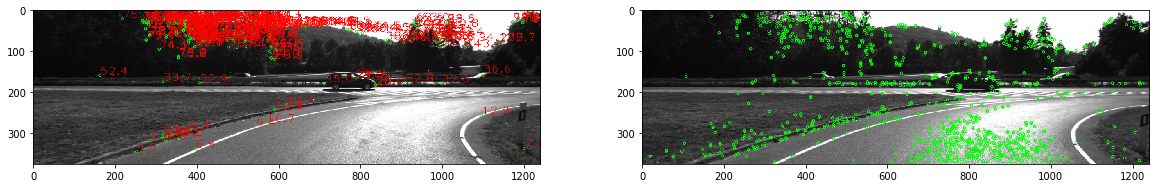

In [5]:
show2(draw_frame_depth(frame[0]), draw_frame_depth(frame[1]))

Show only the ID's in frame[0] that are actually in frame[1], to avoid clutter in the image.

In [ ]:
#kp0 = [kp for kp in frame[0].get_observations() if kp.get_mappoint() in { p.get_mappoint() for p in frame[1].get_observations() }]
#kp1 = [kp for kp in frame[1].get_observations() if kp.has_mappoint()]
#frame[1].compute_depth()
#show2(draw_observations_depth(kp0), draw_observations_depth(kp1))

In [ ]:
frame[5].compute_depth()
frame[5].filter_not_useful()
frame[6].compute_depth()
frame[6].filter_not_useful()
obs1 = [o for o in frame[5].get_observations() ]
obs2 = [o for o in frame[6].get_observations() ]

In [ ]:
show2(draw_observations_depth(obs1), draw_observations_depth(obs2))

In [ ]:
frame[5].compute_depth()
a = [ (o.get_depth(), o.confidence) for o in frame[5].get_observations() if o.confidence is not None and o.confidence > 1.4 ]
len(a)
#show2(draw_frame(frame[5]), draw_frame(frame[5].get_right_frame()))

In [ ]:
pl = [ o for o in frame[5].get_observations() if o.confidence is not None and o.confidence > 1.4 ]
show(draw_observations_depth(pl))

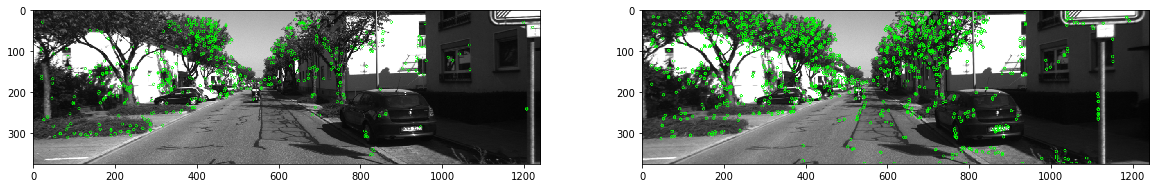

In [17]:
show2(draw_frame(frame[0]), draw_frame(f.get_right_frame()))

In [15]:
f = frame[0]

In [18]:
f.compute_depth()

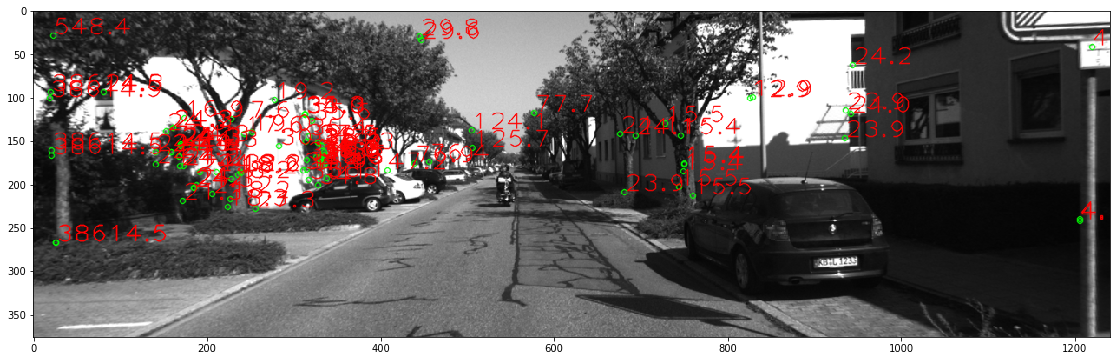

In [21]:
show(draw_observations_depth(frame[0].get_observations()[:100]))